In [1]:
import os
import pandas as pd
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import keras
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('test.csv').fillna(0).drop(columns=['date_id', 'is_scored'])
data

,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,...,V3,V4,V5,V6,V7,V8,V9,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,0,0,0,0,1,0,0,1,0,1.577651,...,0.892196,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,0.003541,0.000161,0.003068
1,0,0,0,0,1,0,0,1,0,1.575182,...,0.699074,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,-0.005964,0.000162,-0.006437
2,0,0,0,0,1,0,0,0,1,1.572720,...,0.647487,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,-0.007410,0.000160,-0.007882
3,0,0,0,0,1,0,0,0,1,1.570266,...,0.445767,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,0.005420,0.000160,0.004949
4,0,0,0,0,0,0,1,0,1,1.567818,...,0.707672,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,0.008357,0.000159,0.007887
5,0,0,0,0,0,0,0,0,0,1.565379,...,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616,-0.002896,0.000159,-0.003365
6,0,0,0,0,0,0,0,0,0,1.562946,...,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289,0.002457,0.000155,0.001990
7,0,0,1,0,0,0,0,0,0,1.560520,...,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946,0.002312,0.000156,0.001845
8,0,0,0,0,0,0,0,0,0,1.558102,...,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265,0.002891,0.000156,0.002424
9,0,0,0,0,0,0,0,0,0,1.555690,...,0.066799,0.783730,1.068037,0.879630,-0.764806,0.079034,-0.705662,0.008310,0.000156,0.007843


In [3]:
y = data['lagged_market_forward_excess_returns'].shift(-1).fillna(0) # np.where(data['lagged_market_forward_excess_returns'].shift(-1) > 0, 1.0, 0.0)
y


0   -0.006437
1   -0.007882
2    0.004949
3    0.007887
4   -0.003365
5    0.001990
6    0.001845
7    0.002424
8    0.007843
9    0.000000
Name: lagged_market_forward_excess_returns, dtype: float64

In [4]:
# X = data.copy()
X = data.drop(columns=['lagged_forward_returns', 'lagged_risk_free_rate', 'lagged_market_forward_excess_returns'])

for column in data.columns:
    if column.startswith('lagged'): continue
    X[f'lagged_{column}'] = X[column].shift(1)
X = X.fillna(0)

X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,...,lagged_V12,lagged_V13,lagged_V2,lagged_V3,lagged_V4,lagged_V5,lagged_V6,lagged_V7,lagged_V8,lagged_V9
0,0,0,0,0,1,0,0,1,0,1.577651,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0,0,1,0,0,1,0,1.575182,...,0.699074,-0.502400,0.882937,0.892196,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909
2,0,0,0,0,1,0,0,0,1,1.572720,...,0.598545,-0.394268,0.863757,0.699074,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326
3,0,0,0,0,1,0,0,0,1,1.570266,...,0.603836,-0.170420,0.848545,0.647487,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979
4,0,0,0,0,0,0,1,0,1,1.567818,...,0.558862,-0.275099,0.826058,0.445767,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997
5,0,0,0,0,0,0,0,0,0,1.565379,...,0.487434,-0.395480,0.807540,0.707672,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045
6,0,0,0,0,0,0,0,0,0,1.562946,...,0.533730,-0.432282,0.785053,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616
7,0,0,1,0,0,0,0,0,0,1.560520,...,0.526455,-0.429506,0.767857,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289
8,0,0,0,0,0,0,0,0,0,1.558102,...,0.433532,-0.425462,0.734127,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946
9,0,0,0,0,0,0,0,0,0,1.555690,...,0.394180,-0.385170,0.695106,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265


In [5]:
models = []
for file in os.listdir('.models'):
    if file.startswith('v8'):
        model = keras.saving.load_model(f'.models/{file}')
        models.append(model)

I0000 00:00:1759142667.643165 1515101 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1131 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1759142667.643505 1515101 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 4657 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


I0000 00:00:1759142669.515062 1515220 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


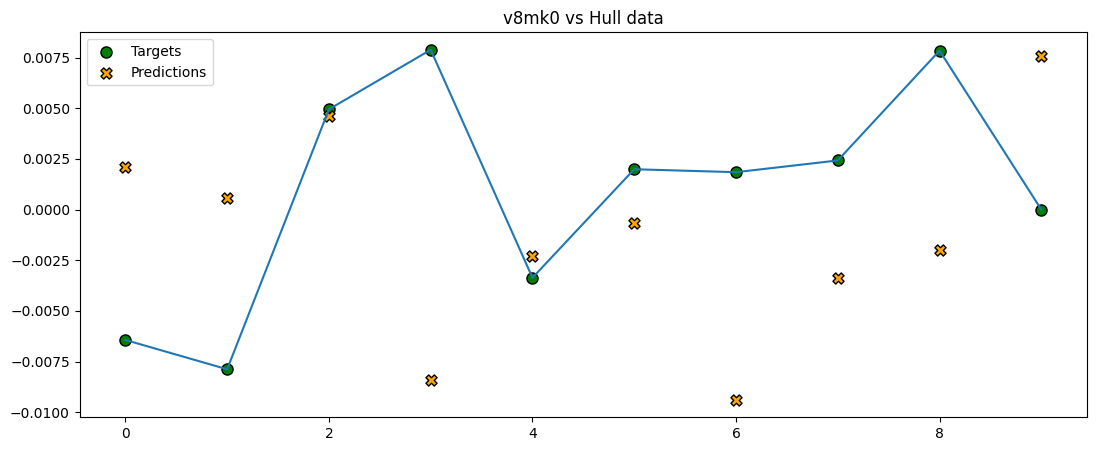

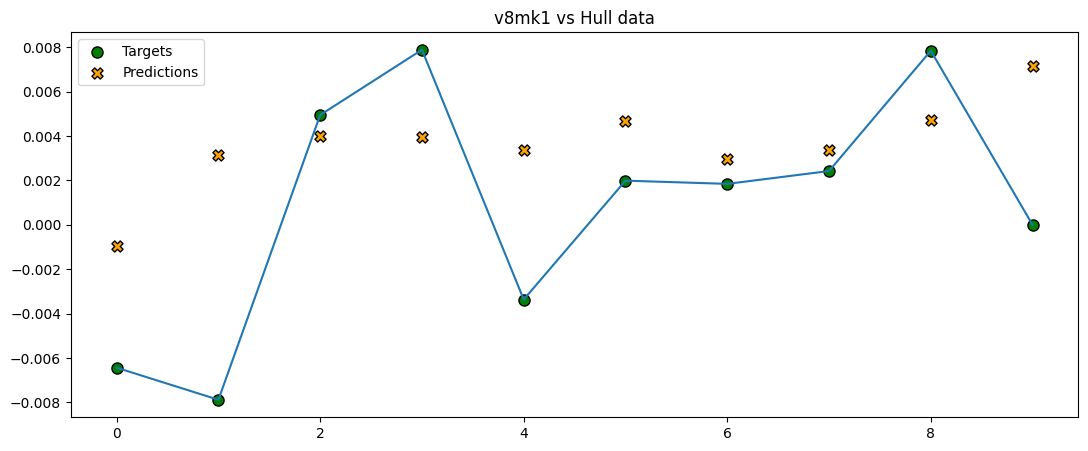

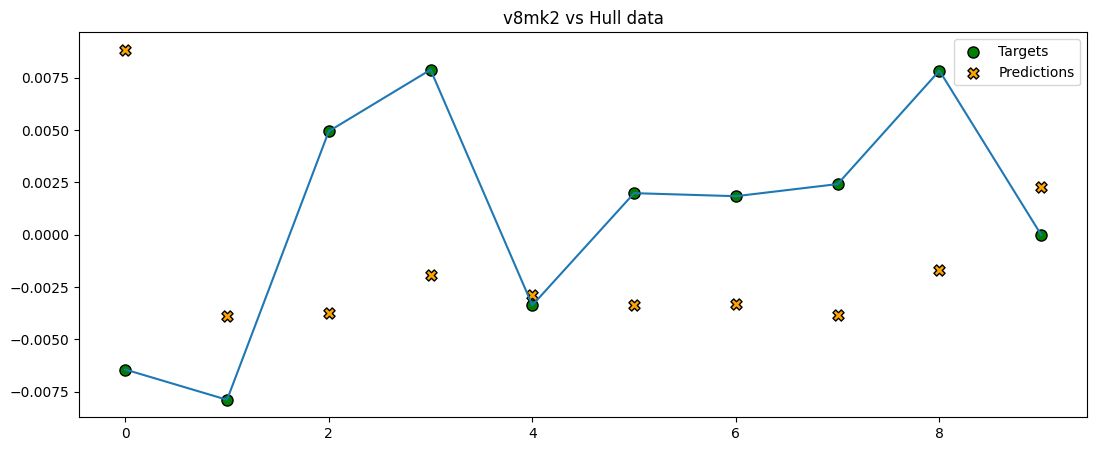

In [6]:
for model in models:
    plt.figure(figsize=(13, 5))
    plt.title(f'{model.name} vs Hull data')
    plt.plot(X.index, y)
    plt.scatter(X.index, y, label='Targets', edgecolors='k', c='g', s=64)
    predictions = model.predict(X)
    plt.scatter(X.index, predictions, label='Predictions', marker='X', edgecolors='k', c='orange', s=64)
    plt.legend()

In [7]:
for model in models:
    print(model.predict(X)[-1][0].item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.007601512596011162
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.007154958788305521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.0023021542001515627
